## Visualization of Retail Detections

In [1]:
import cv2
import json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
data_dir = Path('../data/test/')
subset = 'a'
json_det_file = data_dir / 'a_det_annotations.json'

In [3]:
with open(str(json_det_file), 'r') as f:
    dets = json.load(f)

imgs = dets['images']
detections = dets['annotations']

In [4]:
def get_detections(index):
    img_info = imgs[index]
    img_name = img_info['file_name']
    img_path = data_dir / '{}_images'.format(subset) / img_name
    img_id = img_info['id']
    bbox_list = []
    for det in detections:
        if det['image_id'] == img_id:
            bbox = det['bbox']
            bbox_list.append(bbox)
    return {'img_path': img_path, 'bbox_list': bbox_list}

In [5]:
plt.rcParams['figure.figsize'] = [15, 15]
colors = np.random.randint(0, 255, size=(200, 3), dtype=np.uint8)
def show_detection(example_index):
    det_dict = get_detections(example_index)
    img_path = det_dict['img_path']
    bbox_list = det_dict['bbox_list']
    img = cv2.imread(str(img_path))
    for i, bbox in enumerate(bbox_list):
        x1, y1, w, h = bbox
        color = colors[0].tolist()
        cv2.rectangle(img, (x1, y1), (x1+w, y1+h), color, 3)
        # cv2.putText(img, cls_name, (x1+10, y1 + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
# 漏检 193 745 374 1022 1026 1271 982 1308 452 574 84
# 重检 745 1151 314 489 1450 352 903 841 305 311 1038 1224 321 1044 574 84
# 分类错误 854 781 1026 932 745 1307 1096 189 1159 352 968 272 509 305 574 84(dongpeng & hongniu, kafei & AD, rousongbin & haoliyou, xiangguolao & youlemei, kele & wanglaoji)
# 误检 1021 521 958
# 定位不准 253 450 
# 对瓶子检测较好，盒子检测有漏检或重检

1413


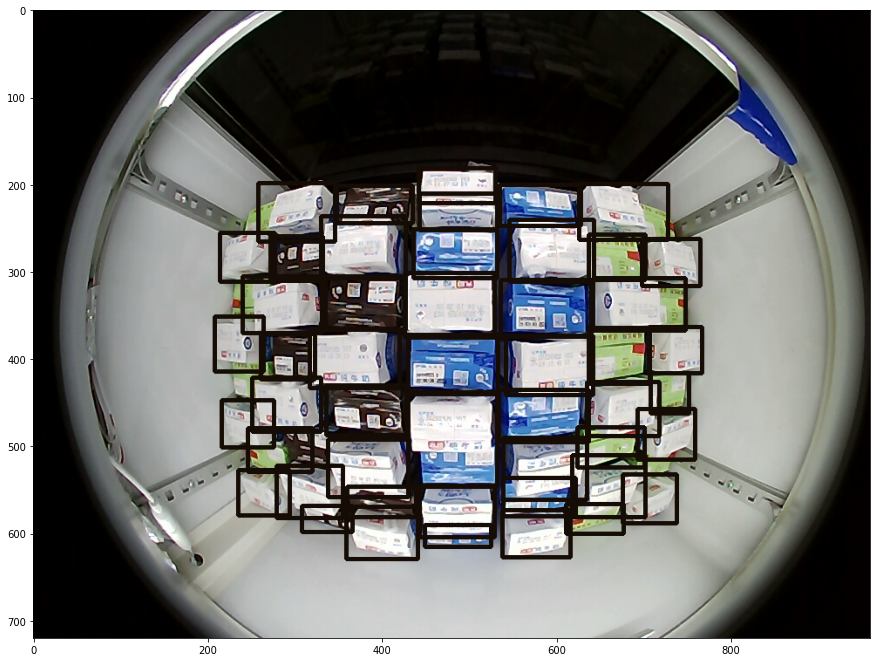

In [7]:
idx = np.random.randint(len(imgs))
print(idx)
show_detection(193)